In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
pd.set_option('display.max_columns',40)

In [4]:
data1 = pd.read_csv(r'interest_prediction_bank.csv')
data1

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [5]:
data1.describe(include = 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [6]:
data1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_interested              0
dtype: int64

In [7]:
data1['Credit_Product'].fillna(data1['Credit_Product'].mode()[0], inplace=True)

In [8]:
data1.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_interested          0
dtype: int64

In [9]:
data1.corr()['Is_interested']

C:\Users\User\AppData\Local\Temp\ipykernel_6792\3743018879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['Is_interested']


Age                    0.230814
Vintage                0.279642
Avg_Account_Balance    0.053370
Is_interested          1.000000
Name: Is_interested, dtype: float64

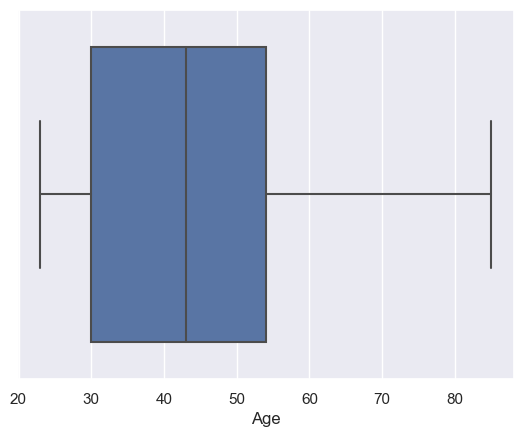

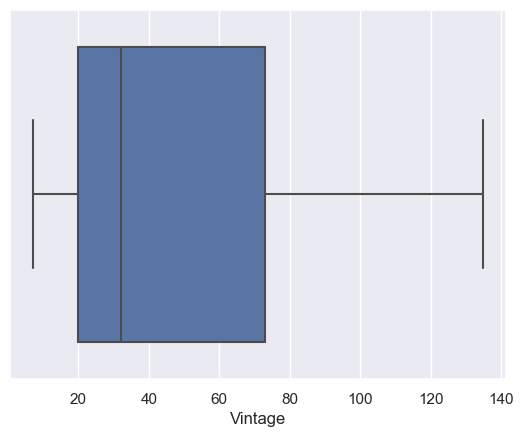

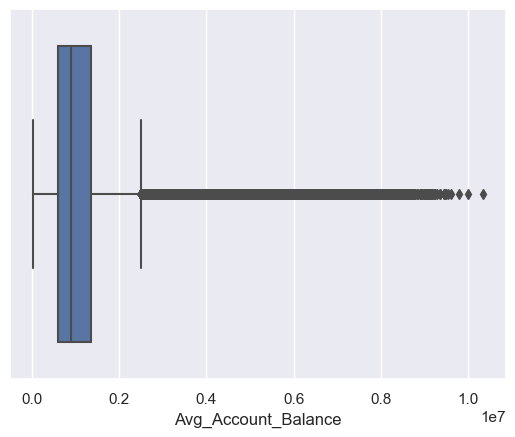

In [10]:
for i in data1[['Age', 'Vintage', 'Avg_Account_Balance']]:
  sns.boxplot(data = data1, x = data1[i])
  plt.show()


In [11]:
q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)
IQR = q3 - q1

Upper = q3 + 1.5*IQR
Lower = q1 - 1.5*IQR

C:\Users\User\AppData\Local\Temp\ipykernel_6792\1521015422.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data1.quantile(0.25)
C:\Users\User\AppData\Local\Temp\ipykernel_6792\1521015422.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data1.quantile(0.75)


In [12]:
for i in data1[['Avg_Account_Balance']]:
    data1[i] = np.where(data1[i] > Upper[i],Upper[i],data1[i])
    data1[i] = np.where(data1[i] < Lower[i],Lower[i],data1[i])

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data1[[#'Age',
                   'Vintage',
                   'Avg_Account_Balance'
                   ]]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,2.464446,Vintage
1,2.464446,Avg_Account_Balance


In [14]:
data1.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_interested'],
      dtype='object')

In [15]:
data2 = data1[['Gender',
               #'Region_Code',
               'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_interested']]

In [16]:
inputs = data2.drop('Is_interested', axis = 1)
output = data2['Is_interested']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def evaluate(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    roc_prob = roc_auc_score(y_test, y_prob)
    gini_prob = roc_prob*2-1

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [19]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB 1.3 MB/s eta 0:01:18
                                             0.1/99.8 MB 544.7 kB/s eta 0:03:04
                                             0.1/99.8 MB 939.4 kB/s eta 0:01:47
                                              0.2/99.8 MB 1.1 MB/s eta 0:01:28
                                              0.3/99.8 MB 1.3 MB/s eta 0:01:16
                                              0.5/99.8 MB 1.9 MB/s eta 0:00:54
                                              0.7/99.8 MB 2.0 MB/s eta 0:00:51
                                              0.8/99.8 MB 2.3 MB/s eta 0:00:44
                                              0.9/99.8 MB 2.2 MB/s eta 0:00:45
                                              1.4/99.8 MB 2.9 MB/s eta 0:00:35
                                              1.8/99.8 MB 3.5 MB/s eta 0:00:29
                                              2.3/99.8 MB

In [20]:
pip install lgb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lgb (from versions: none)
ERROR: No matching distribution found for lgb


In [21]:
pip install catboost

                                              0.0/101.1 MB ? eta -:--:--
                                              0.0/101.1 MB 1.3 MB/s eta 0:01:19
                                              0.1/101.1 MB 1.1 MB/s eta 0:01:37
                                              0.1/101.1 MB 1.1 MB/s eta 0:01:35
                                              0.3/101.1 MB 1.8 MB/s eta 0:00:58
                                              0.5/101.1 MB 2.3 MB/s eta 0:00:44
                                              0.6/101.1 MB 2.3 MB/s eta 0:00:44
                                              0.8/101.1 MB 2.7 MB/s eta 0:00:38
                                              1.1/101.1 MB 3.0 MB/s eta 0:00:34
                                              1.5/101.1 MB 3.7 MB/s eta 0:00:28
                                              1.9/101.1 MB 4.2 MB/s eta 0:00:24
                                              2.4/101.1 MB 4.9 MB/s eta 0:00:21
                                              2

In [32]:
pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB 1.3 MB/s eta 0:00:02
     --                                       0.1/1.3 MB 1.1 MB/s eta 0:00:02
     ----                                     0.2/1.3 MB 1.2 MB/s eta 0:00:01
     --------                                 0.3/1.3 MB 1.8 MB/s eta 0:00:01
     ---------------                          0.5/1.3 MB 2.4 MB/s eta 0:00:01
     --------------------                     0.7/1.3 MB 2.6 MB/s eta 0:00:01
     -------------------------                0.8/1.3 MB 2.6 MB/s eta 0:00:01
     -------------------------------------    1.2/1.3 MB 3.4 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
from catboost import CatBoostClassifier

In [34]:
from xgboost import XGBClassifier

In [35]:
from lightgbm import LGBMClassifier

In [36]:
data2.dtypes

Gender                  object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance    float64
Is_Active               object
Is_interested            int64
dtype: object

In [37]:
catboost_model = CatBoostClassifier(cat_features=['Gender',
                                                  #'Region_Code', (abundance of unique values)
                                                  'Occupation',
                                                  'Channel_Code',
                                                  'Credit_Product',
                                                  'Is_Active'])

In [38]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.092792
0:	learn: 0.6527943	total: 293ms	remaining: 4m 52s
1:	learn: 0.6170318	total: 447ms	remaining: 3m 43s
2:	learn: 0.5899457	total: 558ms	remaining: 3m 5s
3:	learn: 0.5679518	total: 660ms	remaining: 2m 44s
4:	learn: 0.5491157	total: 785ms	remaining: 2m 36s
5:	learn: 0.5344496	total: 916ms	remaining: 2m 31s
6:	learn: 0.5229704	total: 1.04s	remaining: 2m 27s
7:	learn: 0.5100708	total: 1.17s	remaining: 2m 24s
8:	learn: 0.4991529	total: 1.29s	remaining: 2m 22s
9:	learn: 0.4910786	total: 1.4s	remaining: 2m 18s
10:	learn: 0.4843922	total: 1.53s	remaining: 2m 17s
11:	learn: 0.4791607	total: 1.64s	remaining: 2m 14s
12:	learn: 0.4746139	total: 1.75s	remaining: 2m 13s
13:	learn: 0.4704205	total: 1.88s	remaining: 2m 12s
14:	learn: 0.4674933	total: 1.99s	remaining: 2m 10s
15:	learn: 0.4650772	total: 2.11s	remaining: 2m 10s
16:	learn: 0.4625857	total: 2.24s	remaining: 2m 9s
17:	learn: 0.4610444	total: 2.36s	remaining: 2m 8s
18:	learn: 0.4593057	total: 2.47s	remaining: 2m 

In [39]:
result_catboost = evaluate(catboost_model, X_test, y_test)

Gini prob is 55.151004124387384
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     56260
           1       0.64      0.25      0.36     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.60      0.62     73718
weighted avg       0.76      0.79      0.75     73718

[[53810  2450]
 [13136  4322]]


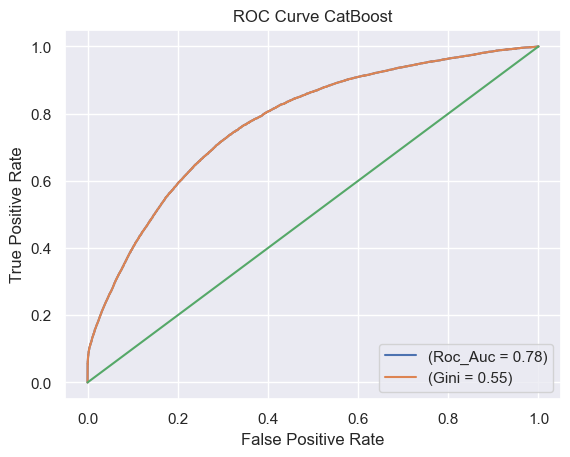

In [40]:
y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [41]:
data_copy = data2.copy()

In [42]:
data_copy = pd.get_dummies(data_copy, drop_first=True)

In [43]:
data_copy.columns

Index(['Vintage', 'Avg_Account_Balance', 'Is_interested', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes'],
      dtype='object')

In [44]:
inputs = data_copy.drop('Is_interested', axis=1)
output = data_copy['Is_interested']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [46]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
result_xgb = evaluate(xgb_clf, X_test, y_test)

Gini prob is 54.44154417099438
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     56260
           1       0.62      0.25      0.36     17458

    accuracy                           0.79     73718
   macro avg       0.71      0.60      0.62     73718
weighted avg       0.76      0.79      0.75     73718

[[53586  2674]
 [13014  4444]]


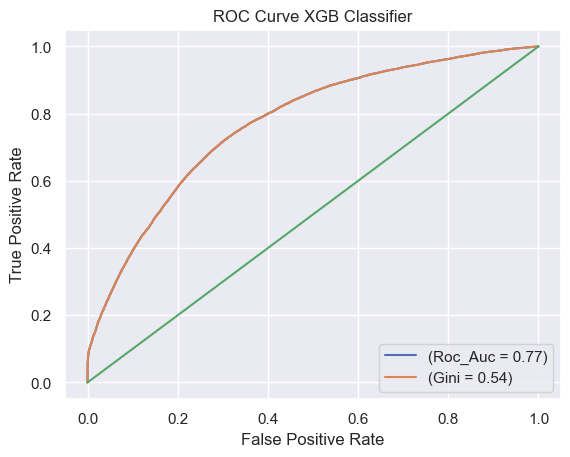

In [48]:
y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

In [49]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130


LGBMClassifier()

In [50]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Gini prob is 55.22155718032864
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     56260
           1       0.65      0.24      0.35     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.60      0.61     73718
weighted avg       0.77      0.79      0.75     73718

[[54039  2221]
 [13338  4120]]


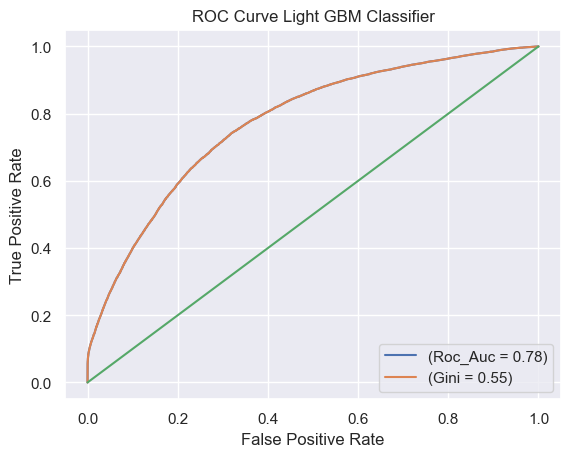

In [51]:
y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light GBM Classifier')

plt.legend(loc='lower right')
plt.show()

In [52]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.092792
0:	learn: 0.6464647	total: 33.7ms	remaining: 33.6s
1:	learn: 0.6079183	total: 61.8ms	remaining: 30.8s
2:	learn: 0.5792827	total: 89.6ms	remaining: 29.8s
3:	learn: 0.5559720	total: 119ms	remaining: 29.6s
4:	learn: 0.5404240	total: 144ms	remaining: 28.7s
5:	learn: 0.5248509	total: 175ms	remaining: 28.9s
6:	learn: 0.5125153	total: 205ms	remaining: 29.1s
7:	learn: 0.5037101	total: 236ms	remaining: 29.2s
8:	learn: 0.4961472	total: 262ms	remaining: 28.9s
9:	learn: 0.4905545	total: 292ms	remaining: 28.9s
10:	learn: 0.4852260	total: 322ms	remaining: 29s
11:	learn: 0.4807945	total: 350ms	remaining: 28.8s
12:	learn: 0.4772184	total: 382ms	remaining: 29s
13:	learn: 0.4737539	total: 408ms	remaining: 28.8s
14:	learn: 0.4710050	total: 441ms	remaining: 29s
15:	learn: 0.4690662	total: 469ms	remaining: 28.9s
16:	learn: 0.4675029	total: 496ms	remaining: 28.7s
17:	learn: 0.4662782	total: 523ms	remaining: 28.5s
18:	learn: 0.4651484	total: 551ms	remaining: 28.5s
19:	learn: 0.4

In [53]:
result_cb = evaluate(cb_clf, X_test, y_test)

Gini prob is 54.92748774500269
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     56260
           1       0.63      0.25      0.36     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.60      0.62     73718
weighted avg       0.76      0.79      0.75     73718

[[53686  2574]
 [13033  4425]]


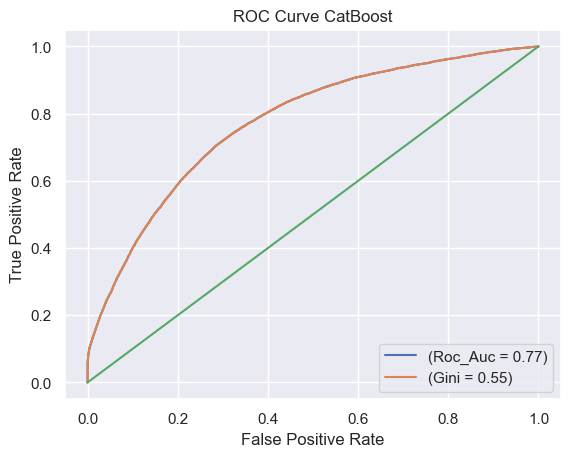

In [54]:
y_prob = cb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [55]:
#----------------------HYPERPARAMETER TUNING----------------------------

In [56]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions1 = {
    'iterations': [10, 50, 100, 500, 1000], # number of boosting iterations to perform.
    # More iterations will typically lead to better performance, but will also increase the training time.
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7), # L2 Regularization can help to prevent overfitting by penalizing large weights.
}

param_distributions1

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [57]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions1,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6882450	total: 22.6ms	remaining: 22.5s
1:	learn: 0.6834322	total: 43.2ms	remaining: 21.6s
2:	learn: 0.6787272	total: 63.2ms	remaining: 21s
3:	learn: 0.6743524	total: 84.6ms	remaining: 21.1s
4:	learn: 0.6699425	total: 105ms	remaining: 20.8s
5:	learn: 0.6656163	total: 125ms	remaining: 20.8s
6:	learn: 0.6613612	total: 146ms	remaining: 20.7s
7:	learn: 0.6571869	total: 166ms	remaining: 20.6s
8:	learn: 0.6531304	total: 185ms	remaining: 20.4s
9:	learn: 0.6493444	total: 206ms	remaining: 20.4s
10:	learn: 0.6454494	total: 227ms	remaining: 20.4s
11:	learn: 0.6417785	total: 249ms	remaining: 20.5s
12:	learn: 0.6380861	total: 269ms	remaining: 20.4s
13:	learn: 0.6344760	total: 289ms	remaining: 20.4s
14:	learn: 0.6311387	total: 310ms	remaining: 20.4s
15:	learn: 0.6277876	total: 332ms	remaining: 20.4s
16:	learn: 0.6246080	total: 353ms	remaining: 20.4s
17:	learn: 0.6212902	total: 373ms	remaining: 20.3s
18:	learn: 0.6180577	total: 393ms	remaining: 20.3s
19:	learn: 0.6150966	total: 414ms	remai

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000024BD5576E50>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [58]:
print("BEST HYPERPARAMETERS for CATBOOST: ", random_search_cb.best_params_)

BEST HYPERPARAMETERS for CATBOOST:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [59]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Gini prob is 53.25633096293632
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     56260
           1       0.66      0.18      0.28     17458

    accuracy                           0.78     73718
   macro avg       0.73      0.58      0.58     73718
weighted avg       0.76      0.78      0.73     73718

[[54658  1602]
 [14326  3132]]


In [60]:
param_distributions2 = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), #  fraction of the training data used to train each tree.
    # Using a fraction of the data can help to prevent overfitting and improve generalization.
    'colsample_bytree': np.linspace(0.5, 1, num=6), #fraction of the features used to train each tree
    'gamma': [0, 1, 5], #  minimum error required to make a split.
    # Increasing the gamma value can help to prevent overfitting
}

param_distributions2

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [61]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions2,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [62]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [63]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Gini prob is 53.48369436910123
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     56260
           1       0.66      0.19      0.29     17458

    accuracy                           0.78     73718
   macro avg       0.73      0.58      0.58     73718
weighted avg       0.76      0.78      0.73     73718

[[54581  1679]
 [14227  3231]]


In [64]:
param_distributions3 = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions3

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [65]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions3,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [66]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [67]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)

Gini prob is 52.98876146894542
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     56260
           1       0.00      0.00      0.00     17458

    accuracy                           0.76     73718
   macro avg       0.38      0.50      0.43     73718
weighted avg       0.58      0.76      0.66     73718

[[56260     0]
 [17458     0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#--------------------STACKING----------------------------------------

In [70]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -                                        0.1/1.4 MB 544.7 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 819.2 kB/s eta 0:00:02
     -----                                    0.2/1.4 MB 1.0 MB/s eta 0:00:02
     --------                                 0.3/1.4 MB 1.3 MB/s eta 0:00:01
     --------------                           0.5/1.4 MB 1.9 MB/s eta 0:00:01
     -----------------                        0.6/1.4 MB 1.9 MB/s eta 0:00:01
     ----------------------                   0.8/1.4 MB 2.2 MB/s eta 0:00:01
     --------------------------               1.0/1.4 MB 2.3 MB/s eta 0:00:01
     -------------------------------------    1.4/1.4 MB 2.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [72]:
classifiers =      [RandomForestClassifier(),
                    CatBoostClassifier(),
                    XGBClassifier()]

In [73]:
meta_classifier = LGBMClassifier()

In [76]:
stacking_classifier = StackingCVClassifier(classifiers= classifiers,
                                           meta_classifier= meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42,
                                           n_jobs = -1)

In [77]:
stacking_classifier.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: randomforestclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting classifier2: catboostclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting classifier3: xgbclassifier (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


Learning rate set to 0.092792
0:	learn: 0.6464647	total: 31.3ms	remaining: 31.3s
1:	learn: 0.6079183	total: 59.8ms	remaining: 29.9s
2:	learn: 0.5792827	total: 86.3ms	remaining: 28.7s
3:	learn: 0.5559720	total: 115ms	remaining: 28.6s
4:	learn: 0.5404240	total: 139ms	remaining: 27.8s
5:	learn: 0.5248509	total: 169ms	remaining: 28s
6:	learn: 0.5125153	total: 203ms	remaining: 28.8s
7:	learn: 0.5037101	total: 234ms	remaining: 29.1s
8:	learn: 0.4961472	total: 260ms	remaining: 28.6s
9:	learn: 0.4905545	total: 286ms	remaining: 28.3s
10:	learn: 0.4852260	total: 314ms	remaining: 28.3s
11:	learn: 0.4807945	total: 342ms	remaining: 28.2s
12:	learn: 0.4772184	total: 372ms	remaining: 28.2s
13:	learn: 0.4737539	total: 398ms	remaining: 28s
14:	learn: 0.4710050	total: 430ms	remaining: 28.2s
15:	learn: 0.4690662	total: 458ms	remaining: 28.1s
16:	learn: 0.4675029	total: 485ms	remaining: 28s
17:	learn: 0.4662782	total: 511ms	remaining: 27.9s
18:	learn: 0.4651484	total: 537ms	remaining: 27.7s
19:	learn: 0.4

StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  <catboost.core.CatBoostClassifier object at 0x0000024BBCEA7090>,
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                     cv=5, meta_classifier=LGBMClassifier(), n_jobs=-1,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [78]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Gini prob is 54.86115710257562
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     56260
           1       0.64      0.24      0.35     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.60      0.61     73718
weighted avg       0.76      0.79      0.75     73718

[[53898  2362]
 [13301  4157]]


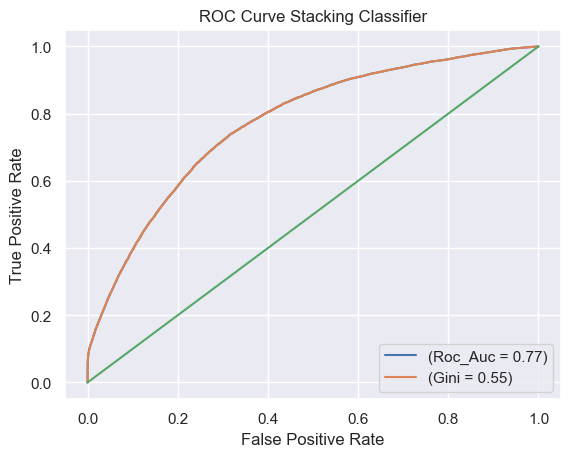

In [79]:

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [ ]:
#---------------DEPLOYMENT-------------------------------------
#The best model is LGB for this data for now. We'll use LGB for deployment

In [87]:
test_data = pd.read_csv(r'interest_prediction_bank_test_set.csv')

In [88]:
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [89]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [90]:
test_data['Credit_Product'].fillna(test_data['Credit_Product'].mode()[0], inplace=True)

In [91]:
test_data_new = test_data[['ID', 'Gender',
               #'Region_Code',
               'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]

In [92]:
data_copy2 = test_data_new.copy()

In [102]:
data_copy3 = test_data_new[['Gender', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']]

In [104]:
data_copy3

,Gender,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,Other,X1,25,Yes,742366,No
1,Male,Other,X2,49,No,925537,No
2,Male,Salaried,X1,14,No,215949,No
3,Male,Other,X1,33,No,868070,No
4,Female,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...
105307,Male,Salaried,X2,86,Yes,4242558,Yes
105308,Male,Other,X2,86,Yes,1159153,No
105309,Male,Salaried,X4,15,No,1703727,No
105310,Male,Other,X3,93,No,737178,Yes


In [105]:
data_copy3 = pd.get_dummies(data_copy3, drop_first = True)

In [106]:
data_copy3

,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,25,742366,1,1,0,0,0,0,0,1,0
1,49,925537,1,1,0,0,1,0,0,0,0
2,14,215949,1,0,1,0,0,0,0,0,0
3,33,868070,1,1,0,0,0,0,0,0,0
4,19,657087,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
105307,86,4242558,1,0,1,0,1,0,0,1,1
105308,86,1159153,1,1,0,0,1,0,0,1,0
105309,15,1703727,1,0,1,0,0,0,1,0,0
105310,93,737178,1,1,0,0,0,1,0,0,1


In [107]:
data_copy3 = data_copy3.merge(test_data[['Vintage','ID']].drop_duplicates(subset='Vintage'), how='right', on='Vintage')

In [108]:
data_copy3

,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,ID
0,25,742366,1,1,0,0,0,0,0,1,0,VBENBARO
1,25,1056955,0,0,1,0,0,0,0,0,0,VBENBARO
2,25,654141,0,1,0,0,0,0,0,0,0,VBENBARO
3,25,523969,0,0,0,1,0,0,0,0,0,VBENBARO
4,25,282966,1,0,1,0,0,0,0,0,0,VBENBARO
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,135,329887,0,0,0,1,0,1,0,0,0,DKBUPCVP
105308,135,2548630,1,1,0,0,0,1,0,1,1,DKBUPCVP
105309,135,957301,0,1,0,0,0,1,0,0,0,DKBUPCVP
105310,135,1991526,1,0,0,1,0,1,0,1,1,DKBUPCVP


In [110]:
data_copy3.set_index('ID', inplace=True)

In [111]:
data_copy3

,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,
VBENBARO,25,742366,1,1,0,0,0,0,0,1,0
VBENBARO,25,1056955,0,0,1,0,0,0,0,0,0
VBENBARO,25,654141,0,1,0,0,0,0,0,0,0
VBENBARO,25,523969,0,0,0,1,0,0,0,0,0
VBENBARO,25,282966,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
DKBUPCVP,135,329887,0,0,0,1,0,1,0,0,0
DKBUPCVP,135,2548630,1,1,0,0,0,1,0,1,1
DKBUPCVP,135,957301,0,1,0,0,0,1,0,0,0


In [114]:
probability = lgb_clf.predict_proba(data_copy3)[:,1]

In [115]:
data_copy3['PD'] = probability

In [116]:
data_copy3

,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,PD
ID,,,,,,,,,,,,
VBENBARO,25,742366,1,1,0,0,0,0,0,1,0,0.074713
VBENBARO,25,1056955,0,0,1,0,0,0,0,0,0,0.068725
VBENBARO,25,654141,0,1,0,0,0,0,0,0,0,0.041625
VBENBARO,25,523969,0,0,0,1,0,0,0,0,0,0.065381
VBENBARO,25,282966,1,0,1,0,0,0,0,0,0,0.070257
...,...,...,...,...,...,...,...,...,...,...,...,...
DKBUPCVP,135,329887,0,0,0,1,0,1,0,0,0,0.123977
DKBUPCVP,135,2548630,1,1,0,0,0,1,0,1,1,0.256126
DKBUPCVP,135,957301,0,1,0,0,0,1,0,0,0,0.173938
